In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/student-mat.csv",sep=";")

# View top rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
print("Shape:", df.shape)


Shape: (395, 33)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### df.describe()

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Create new target column
df['Dropout'] = df['G3'].apply(lambda x: 1 if x < 10 else 0)

# See value counts
df['Dropout'].value_counts()


Dropout
0    265
1    130
Name: count, dtype: int64

In [8]:
print(df.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Dropout']


In [9]:
df.rename(columns={'sex': 'gender'}, inplace=True)


In [10]:
df.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Dropout
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0


In [11]:
# Binary encode 'gender' column
df['gender'] = df['gender'].map({'M':0 , 'F':1})

In [12]:
# Encode binary 'yes/no' columns
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [13]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

In [14]:
df = df.drop(['G1', 'G2', 'G3'], axis=1)
df.head()

,gender,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,18,4,4,2,2,0,1,0,0,...,False,False,False,False,True,False,False,False,True,False
1,1,17,1,1,1,2,0,0,1,0,...,False,False,True,False,False,False,False,False,False,False
2,1,15,1,1,1,2,3,1,0,1,...,False,False,True,False,False,False,True,False,True,False
3,1,15,4,2,1,3,0,0,1,1,...,False,False,False,True,False,True,False,False,True,False
4,1,16,3,3,1,2,0,0,1,1,...,False,False,True,False,False,True,False,False,False,False


In [15]:
df.head()
df.info()
df['Dropout'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             395 non-null    int64
 1   age                395 non-null    int64
 2   Medu               395 non-null    int64
 3   Fedu               395 non-null    int64
 4   traveltime         395 non-null    int64
 5   studytime          395 non-null    int64
 6   failures           395 non-null    int64
 7   schoolsup          395 non-null    int64
 8   famsup             395 non-null    int64
 9   paid               395 non-null    int64
 10  activities         395 non-null    int64
 11  nursery            395 non-null    int64
 12  higher             395 non-null    int64
 13  internet           395 non-null    int64
 14  romantic           395 non-null    int64
 15  famrel             395 non-null    int64
 16  freetime           395 non-null    int64
 17  goout           

Dropout
0    265
1    130
Name: count, dtype: int64

In [16]:
#Exploratory Data Analysis (EDA)
sns.set(style='whitegrid')

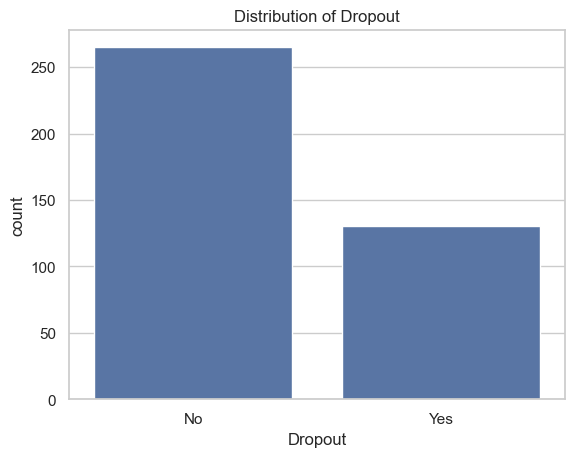

In [17]:
sns.countplot(x='Dropout', data=df)
plt.title('Distribution of Dropout')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


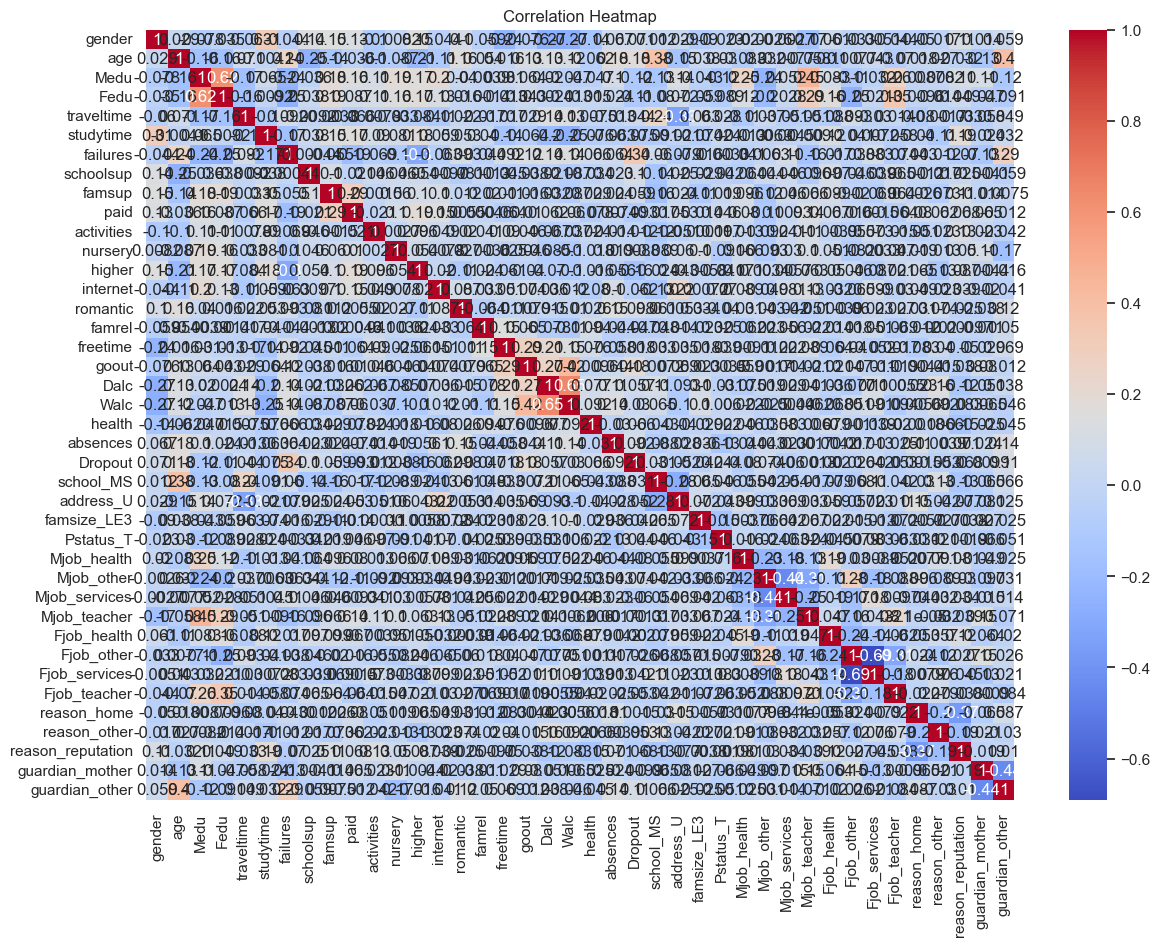

In [18]:
#heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

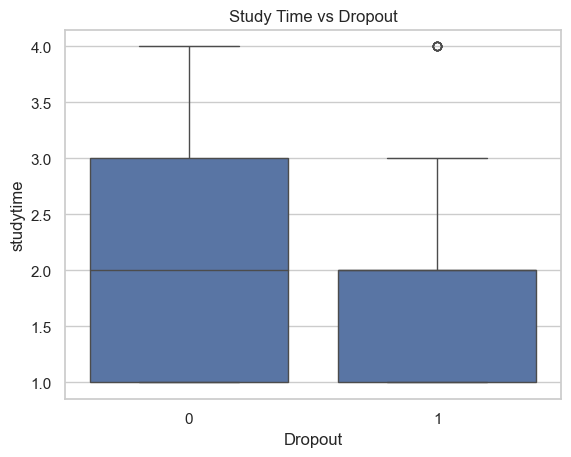

In [19]:
#Study Time vs Dropout
sns.boxplot(x='Dropout', y='studytime', data=df)
plt.title("Study Time vs Dropout")
plt.show()


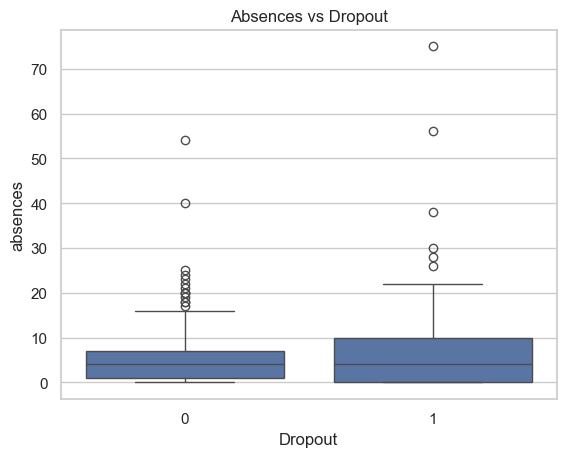

In [20]:
#Absences vs Dropout
sns.boxplot(x='Dropout', y='absences', data=df)
plt.title("Absences vs Dropout")
plt.show()

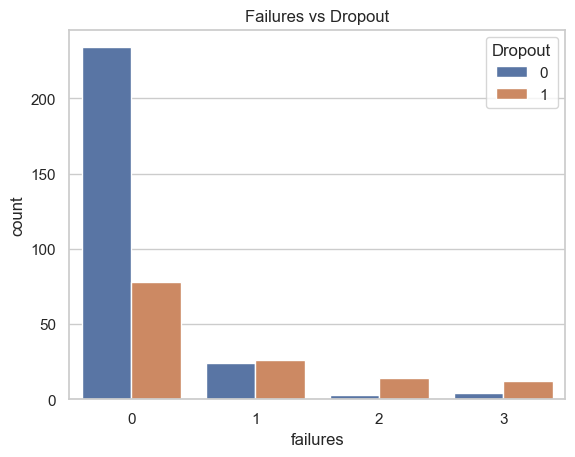

In [21]:
#Failures vs Dropout
sns.countplot(x='failures', hue='Dropout', data=df)
plt.title("Failures vs Dropout")
plt.show()

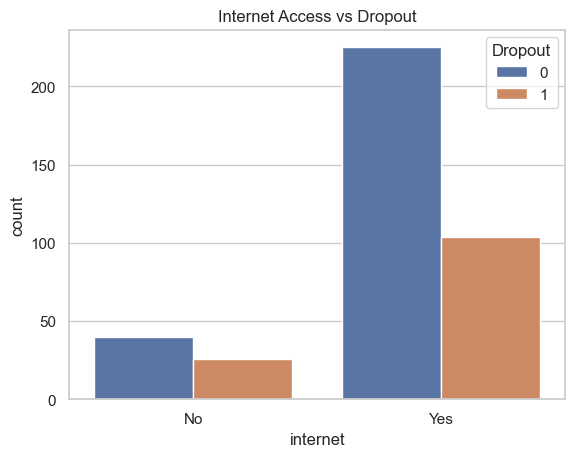

In [22]:
#Internet Access vs Dropout
sns.countplot(x='internet', hue='Dropout', data=df)
plt.title("Internet Access vs Dropout")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Model Building & Training

In [23]:
# Dropout is our target
X = df.drop('Dropout', axis=1)
y = df['Dropout']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
#Training
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7088607594936709

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        52
           1       0.70      0.26      0.38        27

    accuracy                           0.71        79
   macro avg       0.71      0.60      0.59        79
weighted avg       0.71      0.71      0.66        79


Confusion Matrix:
 [[49  3]
 [20  7]]


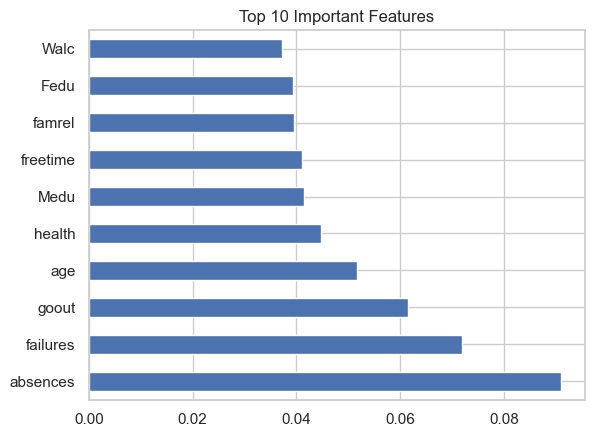

In [28]:
import numpy as np

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [29]:
# Add model predictions
df['Predicted_Dropout'] = model.predict(X)

df.to_csv('../data/final_predictions.csv', index=False)


In [30]:
pip install streamlit joblib


Note: you may need to restart the kernel to use updated packages.


In [31]:
import joblib

joblib.dump(model, 'dropout_model.pkl')


['dropout_model.pkl']

In [43]:
print(X_train.columns.tolist())


['gender', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

categorical_cols = ['gender', 'internet', 'famsize_LE3']  # only include those present
numerical_cols = ['studytime', 'absences', 'failures']

# Column transformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit and save
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'dropout_pipeline.pkl')


['dropout_pipeline.pkl']

In [49]:
X_train.head()


,gender,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
181,0,16,3,3,1,2,0,0,0,1,...,False,False,True,False,False,True,False,False,True,False
194,0,16,2,3,2,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,False
173,1,16,1,3,1,2,3,0,0,0,...,False,False,False,True,False,True,False,False,True,False
63,1,16,4,3,1,3,0,1,1,1,...,True,True,False,False,False,True,False,False,True,False
253,0,16,2,1,2,1,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False


In [51]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [58]:
X = df[['famsize_LE3', 'internet', 'gender', 'studytime', 'absences', 'failures']]



In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

numerical_features = ['famsize_LE3', 'internet', 'gender', 'studytime', 'absences', 'failures']

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Just scale, no encoding
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X[numerical_features], y)
joblib.dump(pipeline, 'dropout_pipeline.pkl')


['dropout_pipeline.pkl']

In [60]:
print(X.columns)  # Check what's available


Index(['famsize_LE3', 'internet', 'gender', 'studytime', 'absences',
       'failures'],
      dtype='object')


In [62]:
X = df[['famsize_LE3', 'gender', 'internet', 'studytime', 'absences', 'failures']]
y = df['Dropout']  # or whatever your target column is
